In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [6]:
import sklearn
print sklearn.__version__

0.18.1


In [71]:
customer_data = pd.read_csv('/Users/Elizabeth.Schwandt/Desktop/customer_classifier.csv')
customer_data.head()

,ID,Account_Name,Years_as_Customer,Monthly_FH_Quota,Sales_Order_ACV,Total_Services_Days,Paid_Days,Services_Days_Delivered,Analyst_Users,Business_Users,...,Avg_FH_Usage,Avg_%_FH_Usage,Month_1_PG,Month_2_PG,Month_3_PG,Month_4_PG,Month_5_PG,Month_6_PG,Avg_PG_Month,Output
0,2123,7-Eleven Inc.(USA),1.64,1000000.0,132500.00,36.0,21.0,16.00000,10.0,6.0,...,447698,0.45,48,243,104,74,82,24,96,3
1,1041,"Purple Strategies, LLC",3.75,5000000.0,0.00,16.0,7.0,11.25000,21.0,27.0,...,658367,0.13,794,2193,4097,779,1464,373,1617,1
2,1565,"AbbVie, Inc.",1.38,1000000.0,115500.00,56.0,46.0,23.96875,19.0,80.0,...,611746,0.61,790,280,700,474,151,54,408,2
3,2193,Air New Zealand LLC,2.54,2000000.0,33118.34,78.0,68.0,16.68750,11.0,12.0,...,1053692,0.53,615,696,432,237,265,219,411,2
4,2401,"All Aboard Florida- Operations, LLC",2.06,1000000.0,55000.00,8.0,3.0,4.06250,4.0,10.0,...,0,0,207,84,253,37,117,54,125,2


In [72]:
clean_data = customer_data.dropna()
clean_data.count()

ID                         533
Account_Name               533
Years_as_Customer          533
Monthly_FH_Quota           533
Sales_Order_ACV            533
Total_Services_Days        533
Paid_Days                  533
Services_Days_Delivered    533
Analyst_Users              533
Business_Users             533
Total_Users                533
%_Services_Delivered       533
%_Services_Paid            533
Total_Logins               533
Unique_Users               533
Avg_Logins                 533
Avg_Unique_Logins          533
Month_1_FH                 533
Month_2_FH                 533
Month_3_FH                 533
Month_4_FH                 533
Month_5_FH                 533
Month_6_FH                 533
Avg_FH_Usage               533
Avg_%_FH_Usage             533
Month_1_PG                 533
Month_2_PG                 533
Month_3_PG                 533
Month_4_PG                 533
Month_5_PG                 533
Month_6_PG                 533
Avg_PG_Month               533
Output  

In [73]:
clean_data.describe()

,ID,Years_as_Customer,Monthly_FH_Quota,Sales_Order_ACV,Total_Services_Days,Paid_Days,Services_Days_Delivered,Analyst_Users,Business_Users,Total_Users,...,Month_6_FH,Avg_FH_Usage,Month_1_PG,Month_2_PG,Month_3_PG,Month_4_PG,Month_5_PG,Month_6_PG,Avg_PG_Month,Output
count,533.000000,533.000000,5.330000e+02,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,...,5.330000e+02,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,1378.660413,1.891320,1.633878e+06,1.492982e+05,14.435497,7.372195,8.584321,82.547486,76.253283,158.800769,...,2.562057e+05,8.610161e+05,732.424015,776.806754,751.080675,783.574109,733.983114,561.041276,723.225141,2.258912
std,1035.933667,1.244409,4.448910e+06,4.555963e+05,47.092341,38.559465,58.064910,1373.982888,1028.457045,2394.865811,...,1.536496e+06,5.049082e+06,2199.122809,2468.517135,2087.752708,2152.106564,1963.003203,1564.400149,2007.077762,0.712760
min,0.000000,0.020000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000e+06,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1613.000000,1.770000,1.000000e+06,3.500000e+04,6.000000,0.000000,1.500000,3.000000,2.000000,6.000000,...,1.880000e+02,4.536000e+03,69.000000,74.000000,119.000000,137.000000,112.000000,69.000000,189.000000,2.000000
75%,2305.000000,2.840000,1.000000e+06,1.193500e+05,12.000000,1.000000,5.000000,6.000000,10.000000,16.000000,...,2.186200e+04,1.352360e+05,708.000000,653.000000,737.000000,741.000000,691.000000,524.000000,745.000000,3.000000
max,2891.000000,7.580000,8.433333e+07,5.642494e+06,832.500000,723.500000,1282.937500,30127.000000,21403.000000,51530.000000,...,1.883500e+07,7.131415e+07,39903.000000,45853.000000,37043.000000,34215.000000,30705.000000,27322.000000,35840.000000,3.000000


In [75]:
clean_data.dtypes

ID                           int64
Account_Name                object
Years_as_Customer          float64
Monthly_FH_Quota           float64
Sales_Order_ACV            float64
Total_Services_Days        float64
Paid_Days                  float64
Services_Days_Delivered    float64
Analyst_Users              float64
Business_Users             float64
Total_Users                float64
%_Services_Delivered        object
%_Services_Paid             object
Total_Logins                 int64
Unique_Users                 int64
Avg_Logins                  object
Avg_Unique_Logins           object
Month_1_FH                 float64
Month_2_FH                   int64
Month_3_FH                   int64
Month_4_FH                   int64
Month_5_FH                 float64
Month_6_FH                   int64
Avg_FH_Usage                 int64
Avg_%_FH_Usage              object
Month_1_PG                   int64
Month_2_PG                   int64
Month_3_PG                   int64
Month_4_PG          

In [96]:
clean_data_2 = int('Avg_Unique_Logins')

ValueError: invalid literal for int() with base 10: 'Avg_Unique_Logins'

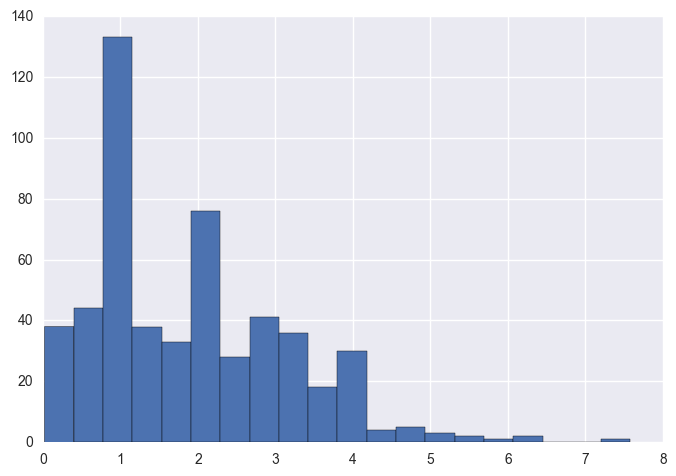

In [76]:
#Distribution of Years as a customer

clean_data['Years_as_Customer'].hist(bins=20)
plt.show()

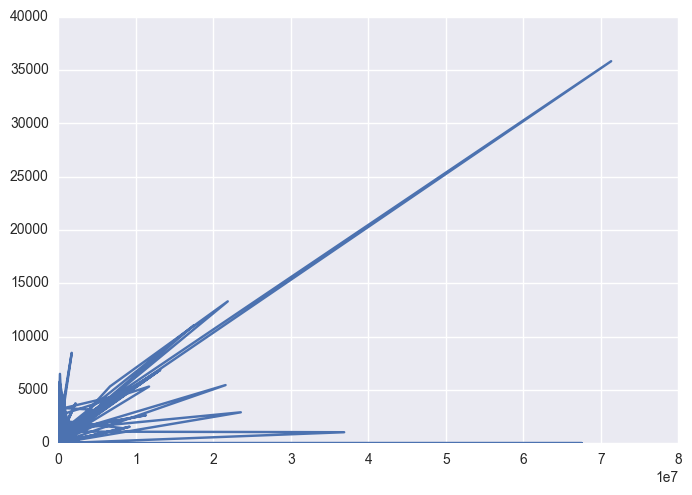

In [77]:
#Plot to show correlation between Firehose Usage and Page Views each month. I would expect there to be a positive correlation.

plt.figure()
plt.plot(clean_data.Avg_FH_Usage, clean_data.Avg_PG_Month)
plt.show()

In [78]:
log_columns = ['Avg_FH_Usage', 'Avg_PG_Month',]
log_clean_data = clean_data.copy()
log_clean_data[log_columns] = log_clean_data[log_columns].apply(np.log10)

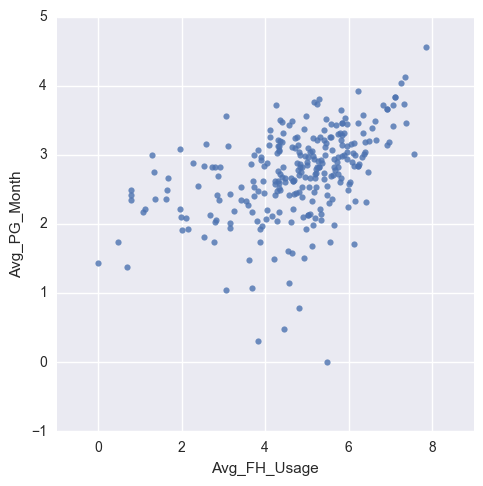

In [13]:
#Log plot between Firehose Usage and Page Views

sns.lmplot('Avg_FH_Usage', 'Avg_PG_Month', log_clean_data)
sns.plt.show()

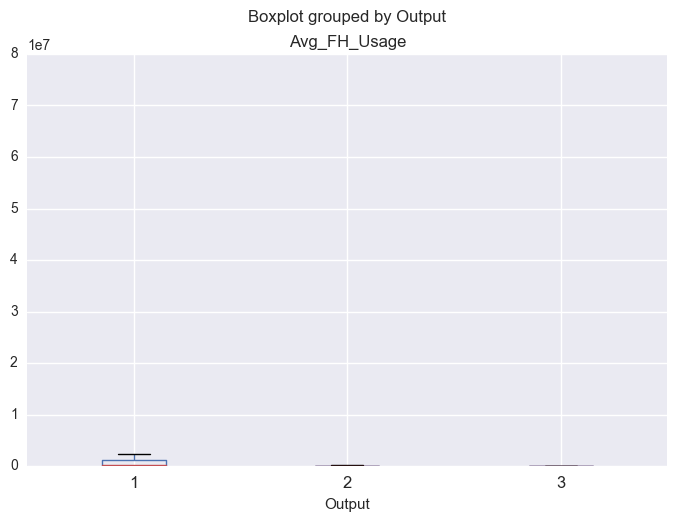

In [79]:
clean_data.boxplot(column='Avg_FH_Usage', by = 'Output')
plt.show()

In [80]:
#Split data into train and test groups. Confirmed success with length below. 
train, test = train_test_split(clean_data, train_size=.75, test_size=.25)

In [81]:
len(train)

399

In [82]:
len(test)

134

In [83]:
train_output = pd.crosstab(index=train["Output"],  
                              columns="count")      

train_output

col_0,count
Output,
1,69
2,154
3,176


In [84]:
test_output = pd.crosstab(index=test["Output"],  
                              columns="count")      

test_output

col_0,count
Output,
1,15
2,73
3,46


In [88]:
target_names = train['Output']
print "*Target",target_names.head()

*Target 303    3
328    3
175    2
562    2
330    3
Name: Output, dtype: int64


In [90]:
feature_names = train.ix[:,train.columns != 'Output']
feature_names.head()

,ID,Account_Name,Years_as_Customer,Monthly_FH_Quota,Sales_Order_ACV,Total_Services_Days,Paid_Days,Services_Days_Delivered,Analyst_Users,Business_Users,...,Month_6_FH,Avg_FH_Usage,Avg_%_FH_Usage,Month_1_PG,Month_2_PG,Month_3_PG,Month_4_PG,Month_5_PG,Month_6_PG,Avg_PG_Month
303,0,Facility Central de Servicios Ltda,2.00,1000000.0,11021.0,0.0,0.0,0.0000,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
328,0,St. Leon,2.00,1000000.0,16316.0,0.0,0.0,0.0000,0.0,0.0,...,87,45,0,0,0,0,0,0,0,0
175,2451,Glock Inc. - Swarm Agency,0.82,1000000.0,0.0,9.0,0.0,1.5000,2.0,2.0,...,11,45842,0.05,191,94,238,151,122,185,164
562,983,Siegel+Gale,3.82,1000000.0,0.0,9.0,0.0,3.6875,5.0,0.0,...,78702,21392,0.02,134,512,738,117,398,69,328
330,0,Substance,2.00,1000000.0,67000.0,0.0,0.0,0.0000,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
y = target_names
X = feature_names
train_dt = DecisionTreeClassifier(max_depth=16)
train_dt.fit(X, y)

ValueError: could not convert string to float: #DIV/0!

In [ ]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

In [ ]:
model = DecisionTreeClassifier(
                max_depth = 16,
                min_samples_leaf = 5)

model.fit(X, y)
build_tree_image(model)

In [ ]:
model = RandomForestClassifier(n_estimators = 100)
    
model.fit(X, y)

In [ ]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

In [ ]:
scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))